In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


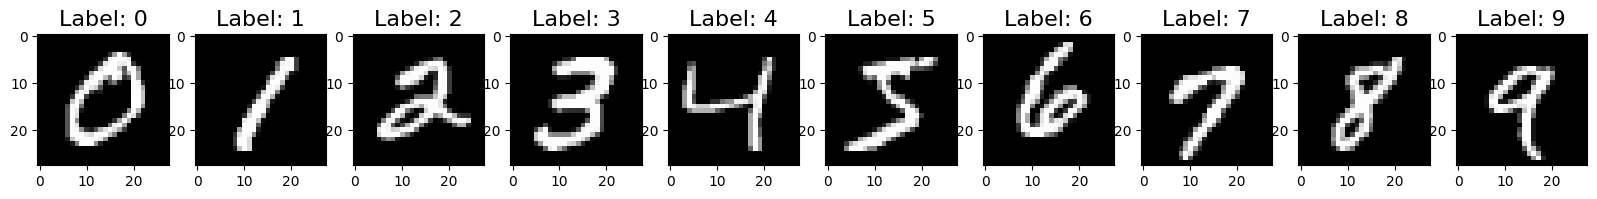

In [4]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [5]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [8]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


In [10]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)


Epoch 1/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0452 - accuracy: 0.9863
Epoch 2/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0407 - accuracy: 0.9872
Epoch 3/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0364 - accuracy: 0.9886
Epoch 4/10
118/118 [==============================] - 2s 20ms/step - loss: 0.0316 - accuracy: 0.9903
Epoch 5/10
118/118 [==============================] - 2s 14ms/step - loss: 0.0280 - accuracy: 0.9914
Epoch 6/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0252 - accuracy: 0.9923
Epoch 7/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0229 - accuracy: 0.9926
Epoch 8/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0199 - accuracy: 0.9939
Epoch 9/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0202 - accuracy: 0.9935
Epoch 10/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0161 - accura

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))


313/313 [==============================] - 1s 2ms/step - loss: 0.0716 - accuracy: 0.9810
Test Loss: 0.07164917141199112, Test Accuracy: 0.9810000061988831


In [15]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)


313/313 [==============================] - 2s 5ms/step
[[2.7947376e-08 5.9264099e-08 4.0965631e-08 ... 9.9999231e-01
  2.5988169e-09 4.1997018e-06]
 [5.0057195e-11 6.9781427e-06 9.9999291e-01 ... 7.1221244e-11
  8.6122824e-11 1.2621524e-16]
 [1.8318904e-07 9.9931318e-01 6.5428518e-05 ... 4.0076059e-04
  1.7682185e-04 2.5175478e-07]
 ...
 [1.5375524e-13 6.3231351e-11 1.1787293e-13 ... 5.8567380e-08
  3.5360790e-09 2.5443424e-07]
 [1.8302736e-11 9.4182830e-15 7.0881603e-18 ... 2.8141069e-15
  4.7681297e-08 1.0379867e-11]
 [1.8937905e-11 1.3317719e-15 4.0792819e-13 ... 5.1067515e-19
  8.8591623e-14 3.2412807e-14]]
[7 2 1 ... 4 5 6]


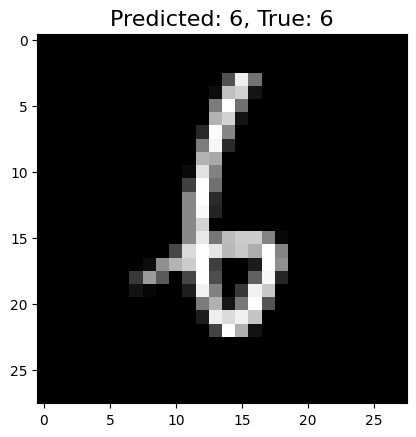

In [16]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

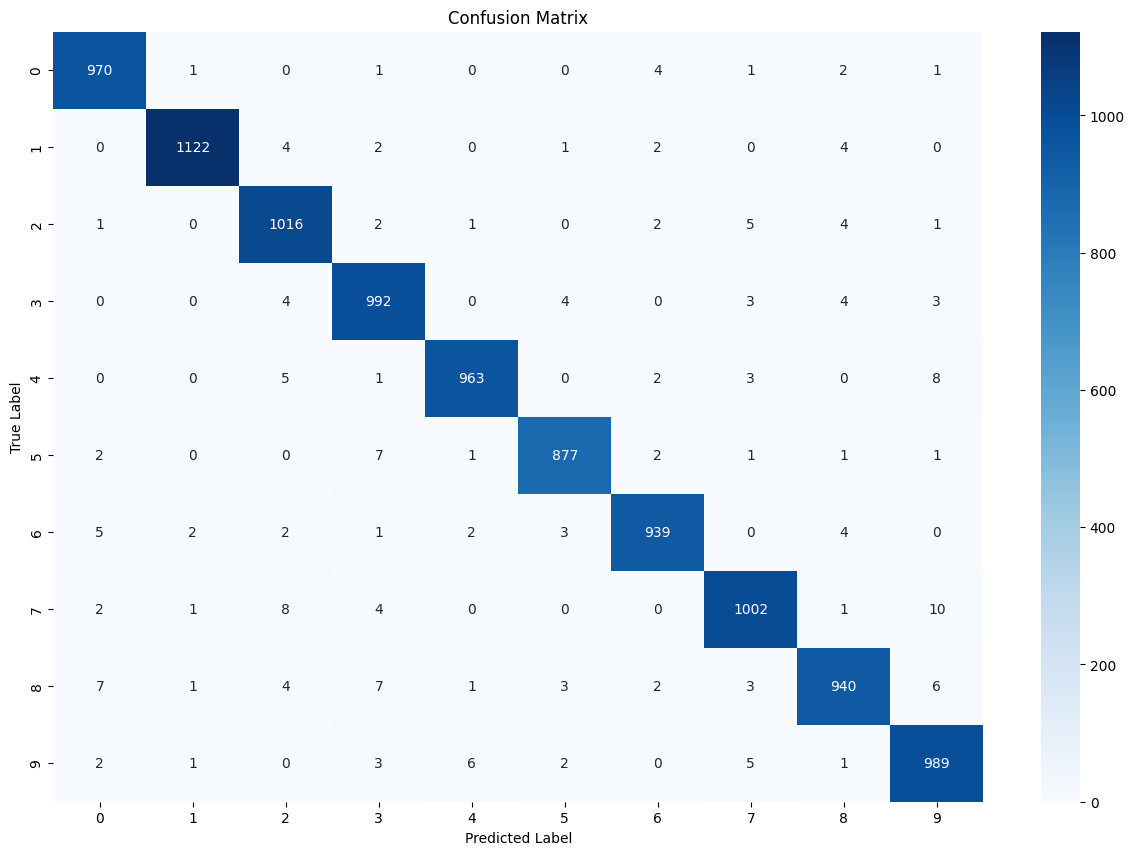

In [17]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');